In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import re
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./features.csv')
df1 = pd.read_csv('./ALL_Axial_T2_STAR_11_20_2023.csv')

In [3]:
df.shape

(1289, 90112)

In [4]:
def assign(weight,df):
    # weight is a 44*1 array which is the weight of each subset of 2048 features
    res = np.zeros((df.shape[0], 2048))
    for i in range(44):
        x= df.iloc[:,2048*i:2048*(i+1)]*weight[i]
        x = x.values
        res = res + x
    return pd.DataFrame(res)

In [5]:
def generate_weight1(mean, var, n):
    x = np.linspace(-1, 1, n)
    gaussian_weights = np.exp(-((x - mean) ** 2) / (2 * var))
    gaussian_weights = gaussian_weights / np.sum(gaussian_weights)
    return gaussian_weights

In [6]:
def generate_weight(mean, var, n):

    samples = np.random.normal(mean, np.sqrt(var), n)
    differences = np.abs(samples - mean)


    sorted_samples = samples[np.argsort(differences)]
    sorted_samples = sorted_samples[::-1]

    # normalize
    sorted_samples = sorted_samples / np.sum(sorted_samples)

    return sorted_samples

In [7]:
# intialize the weight in normal distribution
# df = d1
d1 = df
weight = generate_weight(0, 1, 44)
def assign(weight,df):
    # weight is a 44*1 array which is the weight of each subset of 2048 features
    res = np.zeros((df.shape[0], 2048))
    for i in range(44):
        x= df.iloc[:,2048*i:2048*(i+1)]*weight[i]
        x = x.values
        res = res + x
    return pd.DataFrame(res)
df = assign(weight,df)

In [8]:
df.shape

(1289, 2048)

In [9]:
def extract_id(path):

    # Regular expression pattern to match the desired part of the string
    pattern = r'ADNI/([^/]+)'

    # Search for the pattern in the given string
    match = re.search(pattern, path)

    # If a match is found, return the matched group
    if match:
        return match.group(1)
    else:
        return None

In [26]:
df = pd.read_csv('features_with_group.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,Subject,Group
0,9.423548,-4.064705,-3.744391,-0.294269,6.763736,3.761086,-0.309034,0.063946,-0.840361,-0.190669,...,-8.189752,7.136146,-0.013556,0.375913,-0.799000,-0.261504,1.054152,0.346002,002_S_0413,0
1,5.479735,6.243704,0.493992,-0.525685,5.638028,1.457902,-0.531929,-0.381722,3.256788,-0.382481,...,6.308019,7.992688,2.653450,-8.227686,0.066557,-0.230853,-7.134838,-3.948962,002_S_1155,2
2,1.533823,6.190648,-1.316709,0.281776,5.154264,2.519643,-0.021029,1.427330,0.898550,0.255983,...,-2.611320,-0.982777,2.311801,4.606013,-0.329512,0.116461,15.995586,1.205304,002_S_1155,2
3,8.930950,-7.897637,-0.438210,-1.383103,0.805472,0.293877,-0.331251,-0.818482,0.323631,-0.027039,...,6.613837,-1.612328,-2.731442,-1.909811,0.296765,-0.146038,-10.082988,0.422769,002_S_1261,0
4,-1.630439,5.347084,1.536458,1.336055,-4.061946,2.254596,-0.409398,-4.687255,2.068738,-0.641452,...,2.214548,5.983371,-4.716522,12.175282,-0.194679,3.351399,-13.384465,0.015990,002_S_1261,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,6.796821,-0.353395,-6.147676,0.009770,9.588413,-4.491896,-0.724833,0.321116,1.810327,-0.631626,...,-3.138888,1.393804,0.382179,0.060647,0.141137,0.723574,12.555386,0.360369,941_S_6054,0
1285,-0.145799,5.847268,0.813645,0.864783,15.120633,0.910161,0.673431,-0.209617,-1.721933,0.016061,...,-4.733423,0.593554,-0.369508,0.421274,-0.065576,-0.379879,7.172580,3.144587,941_S_6058,0
1286,-3.102689,10.376967,5.872663,-0.207958,14.777931,0.810399,0.462300,-0.998910,0.233719,-0.070529,...,2.180659,-1.290928,0.144797,11.802303,0.176184,-2.551496,-1.863975,0.540189,941_S_6068,2
1287,-0.558111,-3.336547,-0.658156,1.419698,-3.900488,8.492900,-0.448744,-0.826125,0.064844,0.055386,...,-3.337182,0.831314,-0.220618,-6.777163,-0.091584,2.144773,2.854973,-0.327364,941_S_6080,0


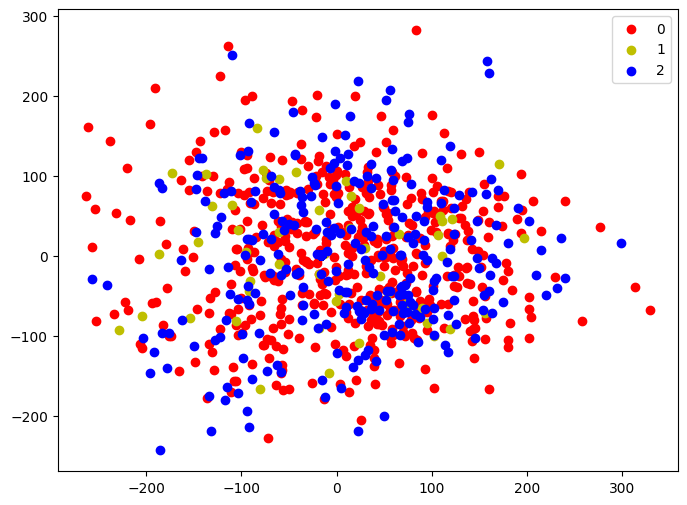

In [27]:
# PCA df to 2D and plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df.iloc[:,:-2])
pca_data = pca.transform(df.iloc[:,:-2])
pca_data = pd.DataFrame(pca_data)
pca_data['Group'] = df['Group']
# scatter plot
plt.figure(figsize=(8,6))
colors = ['r', 'y', 'b']
for i in range(3):
    plt.scatter(pca_data[pca_data['Group']==i][0], pca_data[pca_data['Group']==i][1], label=i,c = colors[i])
plt.legend()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

# Define the model
model = Sequential([
    Dense(1024, input_shape=(2048,), activation='relu', kernel_initializer=GlorotUniform()),
    Dense(512, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 2624515 (10.01 MB)
Trainable params: 2624515 (10.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model = Sequential([
    Dense(1024, input_shape=(2048,), activation='relu', kernel_initializer=GlorotUniform()),
    Dense(512, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
X = df.iloc[:,0:2048]
y = df['Group']
# print(y[:5])
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=3)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,verbose=1)

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
print('Test Loss: %.3f' % loss)




Epoch 1/20
23/23 [==============================] - 1s 51ms/step - loss: 5.1529 - accuracy: 0.5437 - val_loss: 1.7251 - val_accuracy: 0.5967
Epoch 2/20
23/23 [==============================] - 1s 51ms/step - loss: 1.5298 - accuracy: 0.6422 - val_loss: 1.1240 - val_accuracy: 0.6133
Epoch 3/20
23/23 [==============================] - 1s 45ms/step - loss: 0.7301 - accuracy: 0.7365 - val_loss: 0.9874 - val_accuracy: 0.6022
Epoch 4/20
23/23 [==============================] - 1s 47ms/step - loss: 0.5345 - accuracy: 0.7961 - val_loss: 1.1368 - val_accuracy: 0.5691
Epoch 5/20
23/23 [==============================] - 1s 45ms/step - loss: 0.4015 - accuracy: 0.8363 - val_loss: 1.1575 - val_accuracy: 0.5856
Epoch 6/20
23/23 [==============================] - 1s 45ms/step - loss: 0.3512 - accuracy: 0.8502 - val_loss: 1.2774 - val_accuracy: 0.6077
Epoch 7/20
23/23 [==============================] - 1s 45ms/step - loss: 0.3378 - accuracy: 0.8502 - val_loss: 1.3055 - val_accuracy: 0.5746
Epoch 8/20
23

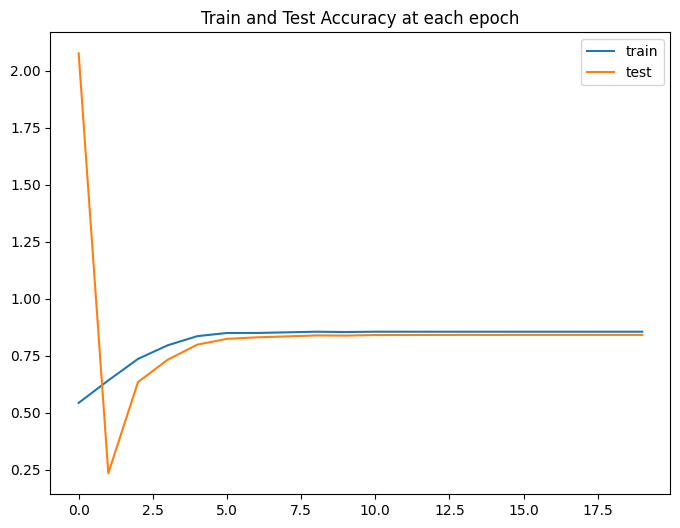

In [30]:
ACC = history.history['accuracy']
TEST = history.history['loss']
TEST[0] = (TEST[0]-1)/2
TEST[1:] =  [(2-i)/2 for i in TEST[1:]]
# plot loss and accuracy
plt.figure(figsize=(8,6))
plt.plot(ACC, label='train')
plt.plot(TEST, label='test')
plt.legend()
plt.title('Train and Test Accuracy at each epoch')
plt.show()


In [31]:
df['Group'].value_counts()

Group
0    781
2    412
1     96
Name: count, dtype: int64

In [18]:
# # ROC and AUC
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import label_binarize
# from scipy import interp
# from itertools import cycle
# from sklearn.metrics import roc_auc_score

# y_predict = model.predict(X_test)
# y_predict.shape
# y_test = label_binarize(y_test, classes=[0, 1, 2])
# n_classes = 3
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_predict[:,i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predict.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# lw=2
# plt.figure(figsize=(8,6))
# plt.plot(fpr[0], tpr[0], color='red',lw=lw, label='CN curve (area = %0.2f)' % roc_auc[0])
# plt.plot(fpr[1], tpr[1], color='yellow',lw=lw, label='MCI curve (area = %0.2f)' % roc_auc[1])
# plt.plot(fpr[2], tpr[2], color='blue',lw=lw, label='AD curve (area = %0.2f)' % roc_auc[2])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.legend()
# plt.show()


In [19]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df.iloc[:,0:2048]
y = df['Group']

# convert to one-hot-encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=3)

# define 10-fold cross validation test harness
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []

for train, test in kfold.split(X, y):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
    model.fit(X.iloc[train], y[train], epochs=10, batch_size=32, verbose=0)
    # evaluate the model
    scores = model.evaluate(X.iloc[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    y_pred = model.predict(X.iloc[test])
    y_pred = np.argmax(y_pred,axis=1)
    y_true = np.argmax(y[test],axis=1)
    # from seaborn import heatmap
    # heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')
    plt.show()

accuracy: 65.12%
9/9 [==============================] - 0s 4ms/step
accuracy: 70.54%
9/9 [==============================] - 0s 4ms/step
accuracy: 75.19%
9/9 [==============================] - 0s 5ms/step
accuracy: 82.56%
9/9 [==============================] - 0s 6ms/step
accuracy: 77.82%
9/9 [==============================] - 0s 4ms/step


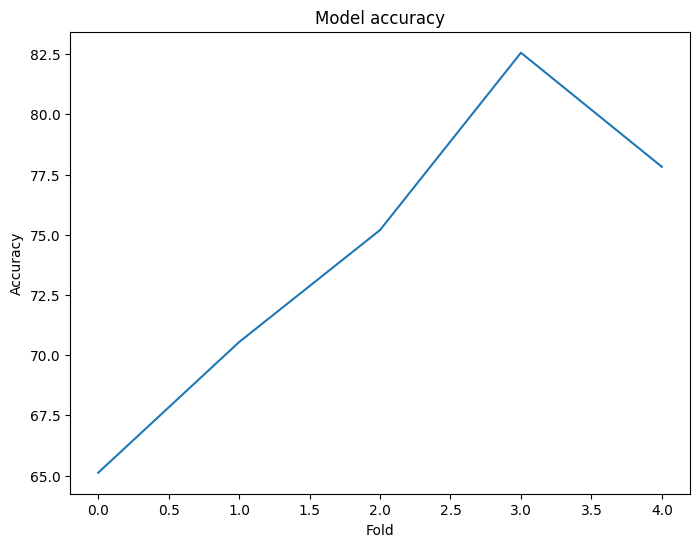

In [20]:
# plot the model accuracy
plt.figure(figsize=(8,6))
plt.plot(cvscores)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.show()

In [21]:
np.mean(cvscores)

74.24637198448181

In [22]:
# # adjust weight
# # like grid search, mean and var will have serveral values
# # the weight with highest accuracy will be used
# mean_l = np.linspace(-1,1,5)
# var_l = np.linspace(0,1,5)
# acc = []

# for mean in mean_l:
#     for var in var_l:
#         df = d1
#         d1 = df
#         weight = generate_weight(mean, var, 44)
#         df = assign(weight,df)

#         for i in range(len(df)):
#             df.loc[i,'Subject'] = extract_id(PATH_LIST[i])
#             # for each subject, find it in df1 and get the group
#             subject = df.loc[i,'Subject']
#             df.loc[i,'Group'] = df1[df1['Subject']==subject]['Group'].values[0]
#         # use number to represent group
#         df['Group'] = df['Group'].replace('CN',0)
#         df['Group'] = df['Group'].replace('AD',1)
#         df['Group'] = df['Group'].replace('MCI',2)

        
#         X = df.iloc[:,0:2048]
#         y = df['Group']
#         y = to_categorical(y, num_classes=3)
#         kfold = KFold(n_splits=5, shuffle=True, random_state=7)
#         cvscores = []
#         for train, test in kfold.split(X, y):
#             model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
#             model.fit(X.iloc[train], y[train], epochs=10, batch_size=32, verbose=0)
#             # evaluate the model
#             scores = model.evaluate(X.iloc[test], y[test], verbose=0)
#             cvscores.append(scores[1] * 100)
#         acc.append(np.mean(cvscores))



In [23]:
# print('max accuracy:',max(acc))
# print('max accuracy index:',acc.index(max(acc)))
# print('best mean:',mean_l[acc.index(max(acc))//5])
# print('best var:',var_l[acc.index(max(acc))%5])